> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>-ScheduledDay’ tells us on what day the patient set up their appointment.

>-‘Neighborhood’ indicates the location of the hospital.

>-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

# analysis questions 

> what is the efective factors of the patient show ?

> what is the relation between the age and the gender ?

> is all of the people who receive a text massage attend ?



# the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


> we will to understand what are the factors affecting on the patient descion to attend the examination or not

In [52]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [53]:
from pandas.plotting import radviz

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_noshow =pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head()




,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check the tail of the data 

df_noshow.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## There Are No Missing Values in The Data

In [6]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df_noshow.shape

(110527, 14)

In [8]:
df_noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object



> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

# Droping The Unnessery Columns 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_noshow.drop(['PatientId','AppointmentID','ScheduledDay',] , axis = 1 , inplace = True)
df_noshow.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# we fond that "No-show" column need to be reanamed 

In [10]:
df_noshow.rename(columns ={'No-show' : 'No_show'},inplace = True)
df_noshow.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis

# General Visualization to the Data  



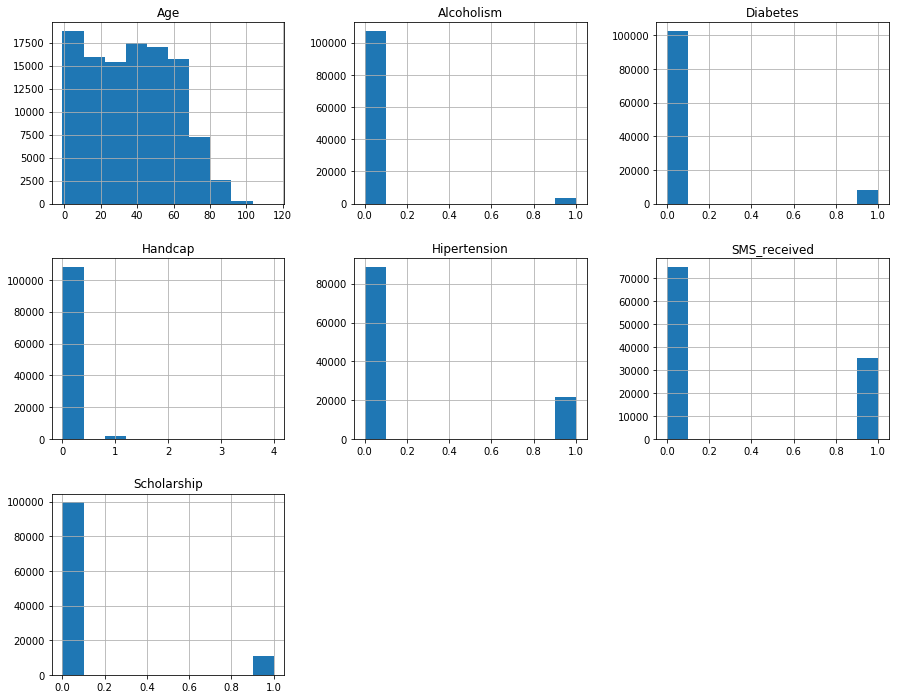

In [12]:
df_noshow.hist(figsize= (15,12));

In [71]:
# dividing the patients into 2 groups (attend , nonattend)

attend = df_noshow.No_show == 'No'
nonattend = df_noshow.No_show == 'Yes'

In [44]:
attend.count()

110527

In [45]:
nonattend

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7          True
8         False
9         False
10        False
11         True
12        False
13        False
14        False
15        False
16        False
17         True
18        False
19        False
20         True
21         True
22         True
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515     True
110516     True
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Name: No_show, Length: 1

In [46]:
attend

0          True
1          True
2          True
3          True
4          True
5          True
6         False
7         False
8          True
9          True
10         True
11        False
12         True
13         True
14         True
15         True
16         True
17        False
18         True
19         True
20        False
21        False
22        False
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
110497     True
110498     True
110499     True
110500     True
110501     True
110502     True
110503     True
110504     True
110505     True
110506     True
110507     True
110508     True
110509     True
110510     True
110511     True
110512     True
110513     True
110514     True
110515    False
110516    False
110517     True
110518     True
110519     True
110520     True
110521     True
110522     True
110523     True
110524     True
110525     True
110526     True
Name: No_show, Length: 1

### the relation between the gender and the attendance

In [68]:
df_noshow.Gender[attend]

0         F
1         M
2         F
3         F
4         F
5         F
8         F
9         F
10        F
12        F
13        M
14        F
15        F
16        M
18        F
19        F
23        F
24        F
25        M
26        F
27        F
28        M
29        F
30        F
32        M
33        F
34        F
35        M
36        F
37        F
         ..
110494    F
110495    M
110497    M
110498    F
110499    F
110500    F
110501    M
110502    F
110503    F
110504    F
110505    F
110506    M
110507    F
110508    F
110509    M
110510    F
110511    F
110512    F
110513    M
110514    F
110517    F
110518    F
110519    F
110520    F
110521    F
110522    F
110523    F
110524    F
110525    F
110526    F
Name: Gender, Length: 88208, dtype: object

Text(27.125, 0.5, 'patients')

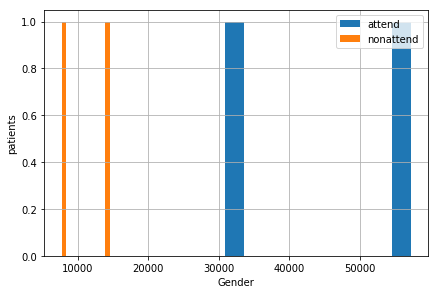

In [67]:
df_noshow.Gender[attend].value_counts().hist(label = 'attend')
df_noshow.Gender[nonattend].value_counts().hist(label = 'nonattend')
plt.legend()
plt.tight_layout()
plt.xlabel('Gender')  
plt.ylabel('patients') 

No handles with labels found to put in legend.


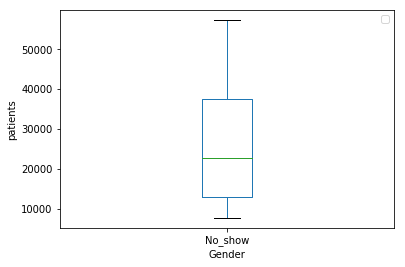

In [69]:
df_noshow.groupby('Gender').No_show.value_counts().plot(kind = 'box');
plt.legend()
plt.xlabel('Gender')  
plt.ylabel('patients');

> we find that the gender does not effect the attendance  

In [28]:
df_noshow.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

In [52]:
 plt.figure();

<Figure size 432x288 with 0 Axes>

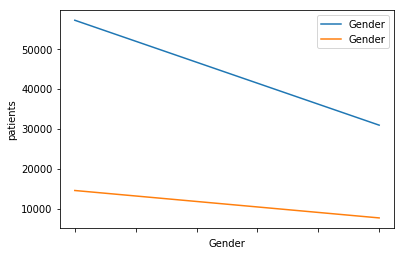

In [73]:
plt.figure();
df_noshow.Gender[attend].value_counts().plot( )
df_noshow.Gender[nonattend].value_counts().plot( )
plt.legend()
plt.xlabel('Gender')  
plt.ylabel('patients');             

### we find that the gender doesn't affect on the relation 

# the relation between the scholarship and the attendance


In [55]:
print(df_noshow.Scholarship[attend].value_counts())
print(df_noshow.Scholarship[nonattend].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


In [74]:
df_noshow.groupby('Scholarship').No_show.value_counts();

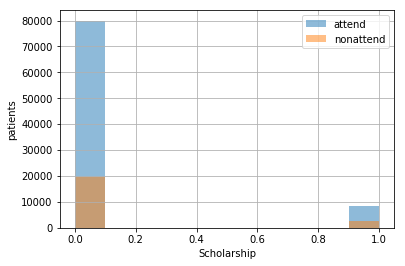

In [19]:
df_noshow.Scholarship[attend].hist(alpha = 0.5 , label = 'attend' )
df_noshow.Scholarship[nonattend].hist(alpha = 0.5 , label = 'nonattend' )
plt.legend()
plt.xlabel('Scholarship')  
plt.ylabel('patients');     

> there is no relation between the scolarship and the attendance 


# the relation between the SMS_received and the attendance

In [69]:
print(df_noshow.SMS_received[attend].value_counts())
print(df_noshow.SMS_received[nonattend].value_counts())

0    62510
1    25698
Name: SMS_received, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


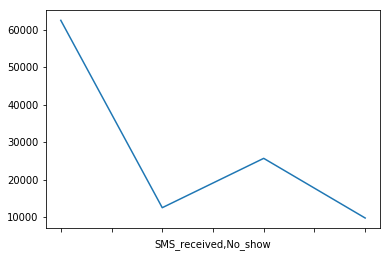

In [70]:
df_noshow.groupby('SMS_received').No_show.value_counts().plot();
plt.title("SMS_received factor")
plt.xlabel("pateints")
plt.ylabel("SMS_received")

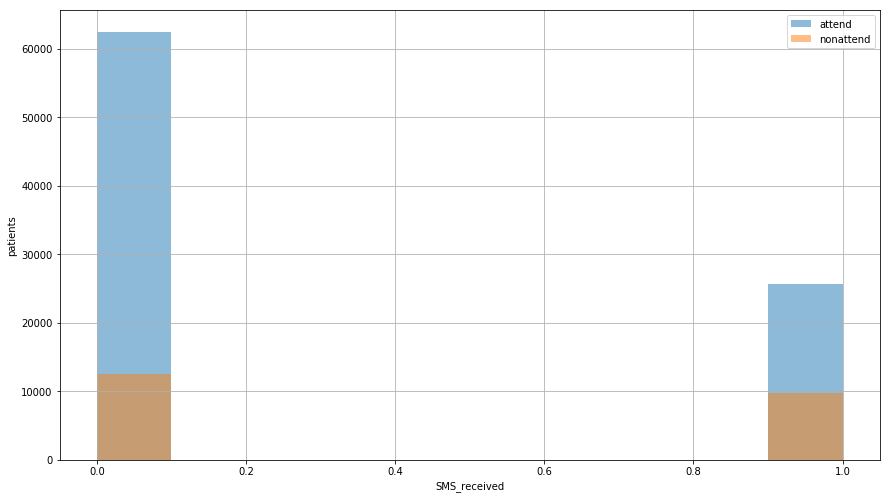

In [20]:
plt.figure(figsize=[14.70,8.27])
df_noshow.SMS_received[attend].hist(alpha = 0.5 , label = 'attend' )
df_noshow.SMS_received[nonattend].hist(alpha = 0.5 , label = 'nonattend' )
plt.legend()
plt.xlabel('SMS_received')  
plt.ylabel('patients'); 

> there is no relation between the SMS_received and the attendace

# the relation between the Diabetes and the attendance 

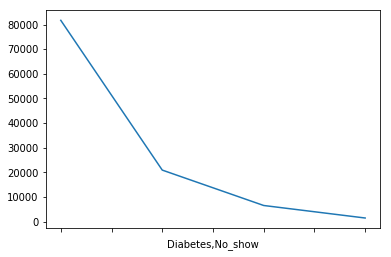

In [72]:
df_noshow.groupby('Diabetes').No_show.value_counts().plot();
plt.title("Diabetes factor")
plt.xlabel("pateints")
plt.ylabel("Diabetes")

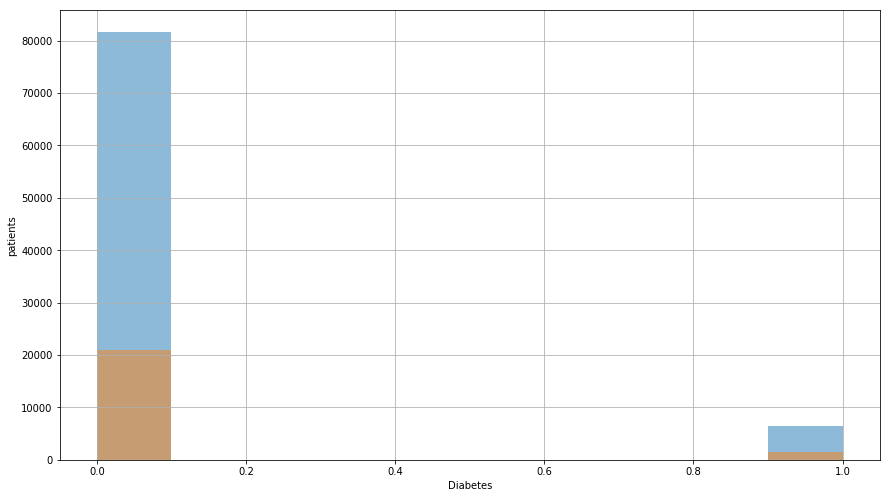

In [21]:
plt.figure(figsize=[14.70,8.27])
df_noshow.Diabetes[attend].hist(alpha = 0.5 , label = 'attend' )
df_noshow.Diabetes[nonattend].hist(alpha = 0.5 , label = 'nonattend' )
plt.xlabel('Diabetes')  
plt.ylabel('patients');

> there is no relation with the Diabetes

# the relation between the Handcap and the attendance 

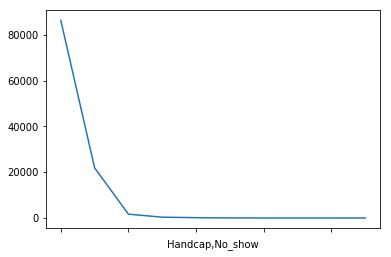

In [75]:
df_noshow.groupby('Handcap').No_show.value_counts().plot();
plt.title("Handcap factor")
plt.xlabel("pateints")
plt.ylabel("Handcap")

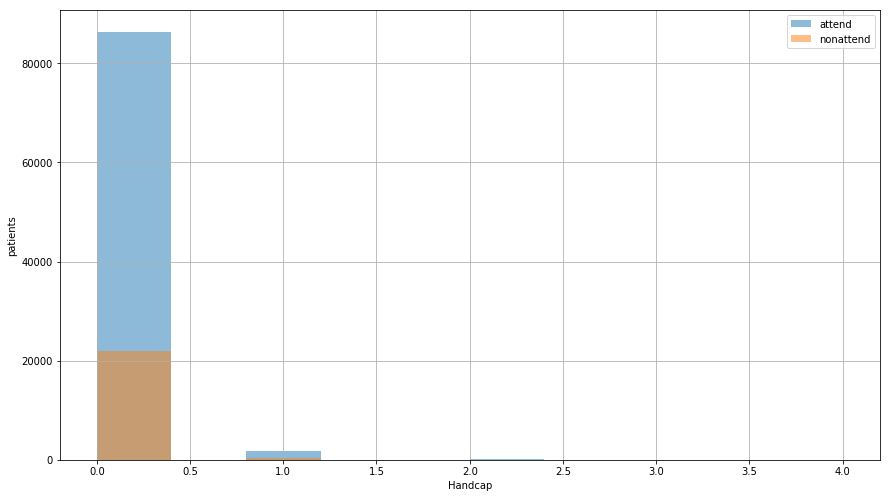

In [80]:
plt.figure(figsize=[14.70,8.27])
df_noshow.Handcap[attend].hist(alpha = 0.5 , label = 'attend' )
df_noshow.Handcap[nonattend].hist(alpha = 0.5 , label = 'nonattend' )
plt.legend()
plt.xlabel('Handcap')  
plt.ylabel('patients');   

> there is no relation with the Handcap 

# the relation between the Age and the attendance 

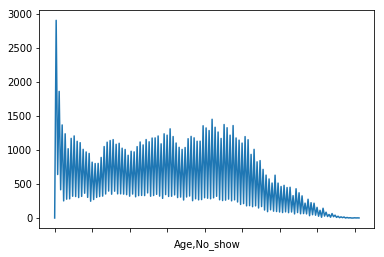

In [83]:
df_noshow.groupby('Age').No_show.value_counts().plot();

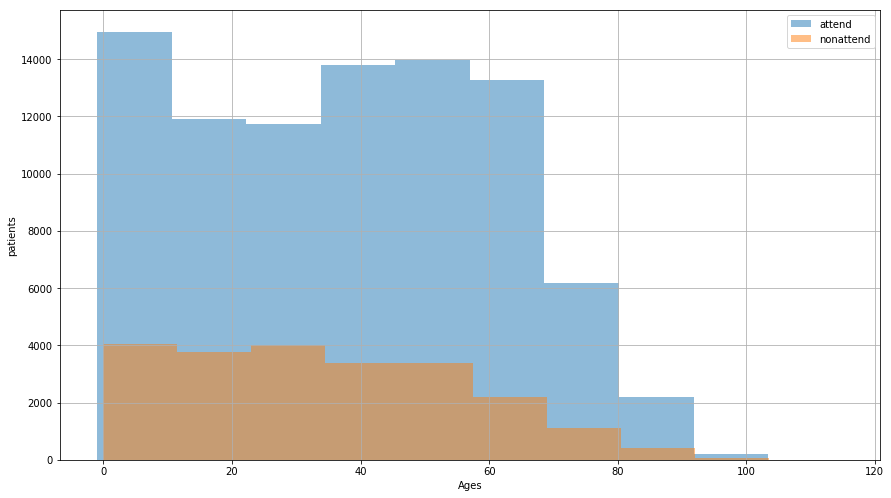

In [80]:
plt.figure(figsize=[14.70,8.27])
df_noshow.Age[attend].hist(alpha = 0.5 , label = 'attend' )
df_noshow.Age[nonattend].hist(alpha = 0.5 , label = 'nonattend' )
plt.legend()
plt.xlabel('Ages')  
plt.ylabel('patients');   

> the range of 0 to 10 yaers old attends more than the other ranges 


> we see that when the patient becomes older, he attends less than before 

# the relation between the Neighbourhood and the attendance 

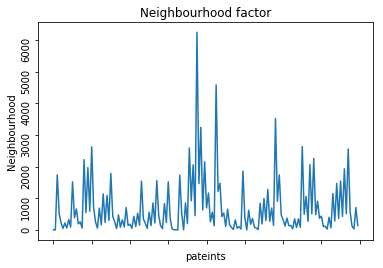

In [82]:
df_noshow.groupby('Neighbourhood').No_show.value_counts().plot();
plt.title("Neighbourhood factor")
plt.xlabel("pateints")
plt.ylabel("Neighbourhood")
plt.xticks(rotation=45)
plt.yticks(rotation=90);


In [ ]:
plt.figure(figsize=[14.70,8.27])
df_noshow.Neighbourhood[attend].hist(alpha = 0.5 , label = 'attend' )
df_noshow.Neighbourhood[nonattend].hist(alpha = 0.5 , label = 'nonattend' )
plt.legend()
plt.xlabel('Neighbourhood')  
plt.ylabel('patients');   

> there is a strong relation between the Neighbourhood and the attendance 

<a id='conclusions'></a>
## Conclusions
> we find unnessiry columns so we earse the (drop)

> we find that there are no missing values 

> we find that the name of " No-show " column need to fix 

> we make a relation between every factor and the attendance 

> we made the data frames "attend " and "nonattend" to discribe the statue of the patient with the certien factors

> **Tip**: Finally, we find that there is no effictive factor for the attendance except the Age and the Neighbourhood . as we see the older people are the less people to attend.

> **Tip**: As strange result we find that the people who didn't reacive an SMS attended more than the people did .

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Limitations

> we can not find a clear relashion between the gender and the attendance 

> the columns of the gender and the No_show was boolean 

> the boolean columns faces a problem to be visualized 

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0